## Import Data From CSV

In [1]:
import unicodecsv 

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('C:\Users\smsa\Downloads\Python Practice\enrollments.csv')
daily_engagement = read_csv('C:\Users\smsa\Downloads\Python Practice\daily_engagement.csv')
project_submissions = read_csv('C:\Users\smsa\Downloads\Python Practice\project_submissions.csv')

In [2]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

## Alternative 用panda读数据，更快，更少代码量

In [147]:
import pandas as pd

In [148]:
daily_engagement = pd.read_csv('C:\Users\smsa\Downloads\Python Practice\daily_engagement.csv')

In [149]:
len(daily_engagement['acct'].unique())

1237

## Update Data Type

In [3]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [ ]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

In [5]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [7]:
len(enrollments)

1640

In [20]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students


In [21]:
len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)
len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)
len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [22]:
'''
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)

len(daily_engagement)

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
len(unique_engagement_students)

len(project_submissions)

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)
'''

"\nunique_enrolled_students = set()\nfor enrollment in enrollments:\n    unique_enrolled_students.add(enrollment['account_key'])\nlen(unique_enrolled_students)\n\nlen(daily_engagement)\n\nunique_engagement_students = set()\nfor engagement_record in daily_engagement:\n    unique_engagement_students.add(engagement_record['acct'])\nlen(unique_engagement_students)\n\nlen(project_submissions)\n\nunique_project_submitters = set()\nfor submission in project_submissions:\n    unique_project_submitters.add(submission['account_key'])\nlen(unique_project_submitters)\n"

In [ ]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [27]:
daily_engagement[1]['account_key']

u'0'

In [38]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break
    

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}


In [43]:
num_problem_student = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_student += 1
print num_problem_student

3


## 找到剩余问题

In [44]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [45]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [46]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [48]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}

for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] >7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
        

## 获取第1周的数据
获取第1周的数据

In [95]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [96]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [97]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [98]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)



6919

In [99]:
engagement_record['utc_date']

datetime.datetime(2015, 6, 18, 0, 0)

## Exploring Student Engagement

In [100]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [101]:
engagement_record

{'account_key': u'1305',
 u'lessons_completed': 0,
 u'num_courses_visited': 0,
 u'projects_completed': 0,
 u'total_minutes_visited': 0.0,
 u'utc_date': datetime.datetime(2015, 5, 18, 0, 0)}

In [102]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [103]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [104]:
total_minutes_by_account.items()[:10]

[(u'619', 1482.9020456663002),
 (u'1140', 129.85920366667),
 (u'669', 0.0),
 (u'428', 726.26075933267),
 (u'344', 614.9778563333),
 (u'0', 494.88049616599994),
 (u'346', 248.12435916639998),
 (u'347', 713.3479524992999),
 (u'340', 392.473794834),
 (u'341', 35.531418)]

In [105]:
total_minutes_by_account.values()[:10]

[1482.9020456663002,
 129.85920366667,
 0.0,
 726.26075933267,
 614.9778563333,
 494.88049616599994,
 248.12435916639998,
 713.3479524992999,
 392.473794834,
 35.531418]

## 纠错现有的数据分析代码

In [106]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [107]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

### <span style="color:red">或者，也可以使用以下简化符号找到带有最大分钟数的帐户关键字：</span>

<strong>max(total_minutes_by_account.items(), key=lambda pair: pair[1])</strong>

## 第1周完成的课程数（Lessons）

In [112]:
engagement_record

{'account_key': u'1305',
 u'lessons_completed': 0,
 u'num_courses_visited': 0,
 u'projects_completed': 0,
 u'total_minutes_visited': 0.0,
 u'utc_date': datetime.datetime(2015, 5, 18, 0, 0)}

In [111]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [113]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [114]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

In [115]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [116]:
#然后，她调用自己创建的函数来分析第一周完成的课程，如下所示：

lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## 第1周的访问次数

In [117]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [118]:
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [128]:
paid_submissions[0]['lesson_key']

u'3176718735'

In [133]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    if ((submission['lesson_key'] in subway_project_lesson_keys) and 
            (submission['assigned_rating']  == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])
        
'''
#######answer###########

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)
'''


In [134]:

len(pass_subway_project)

647

In [135]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## 对比两组学员数据

In [136]:
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print 'non-passing students:'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## 创建直方图

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

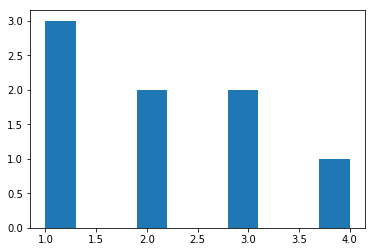

In [137]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [139]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


 Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


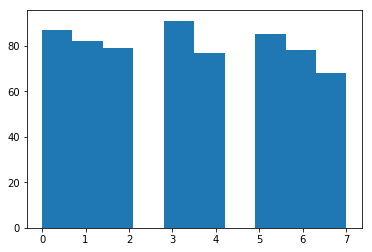

In [141]:
describe_data(passing_visits.values())

In [142]:
passing_visits.values()

[6,
 6,
 7,
 7,
 3,
 5,
 3,
 2,
 0,
 2,
 0,
 2,
 1,
 5,
 3,
 0,
 3,
 3,
 4,
 5,
 3,
 5,
 5,
 0,
 0,
 0,
 0,
 6,
 3,
 0,
 6,
 6,
 6,
 6,
 7,
 6,
 4,
 1,
 4,
 5,
 6,
 6,
 7,
 3,
 7,
 2,
 5,
 7,
 0,
 1,
 0,
 0,
 5,
 3,
 2,
 4,
 5,
 2,
 5,
 0,
 1,
 6,
 1,
 7,
 2,
 1,
 4,
 2,
 0,
 4,
 6,
 2,
 6,
 3,
 4,
 1,
 3,
 6,
 2,
 4,
 0,
 5,
 2,
 0,
 2,
 7,
 7,
 6,
 1,
 5,
 0,
 3,
 4,
 7,
 4,
 4,
 7,
 5,
 1,
 5,
 6,
 5,
 2,
 6,
 1,
 0,
 1,
 3,
 0,
 0,
 2,
 3,
 4,
 1,
 3,
 5,
 6,
 4,
 5,
 2,
 3,
 5,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 4,
 3,
 7,
 4,
 0,
 1,
 3,
 6,
 4,
 1,
 5,
 0,
 6,
 5,
 5,
 1,
 7,
 2,
 2,
 3,
 0,
 3,
 0,
 4,
 5,
 2,
 3,
 7,
 6,
 2,
 5,
 5,
 6,
 4,
 3,
 0,
 1,
 6,
 5,
 4,
 3,
 6,
 0,
 0,
 3,
 1,
 5,
 7,
 4,
 5,
 1,
 1,
 2,
 4,
 0,
 7,
 3,
 0,
 3,
 5,
 5,
 7,
 5,
 7,
 4,
 5,
 3,
 1,
 5,
 7,
 5,
 0,
 0,
 3,
 3,
 2,
 3,
 2,
 2,
 0,
 1,
 0,
 5,
 3,
 2,
 1,
 6,
 1,
 5,
 1,
 6,
 0,
 3,
 2,
 0,
 1,
 6,
 6,
 4,
 2,
 3,
 0,
 4,
 6,
 3,
 3,
 2,
 1,
 0,
 5,
 1,
 7,
 7,
 2,
 2,
 1,
 4,
 3,
 6,
 4,
 0,


## 美化图像

添加标签和标题
在 matplotlib 中，你可以使用 plt.xlabel("Label for x axis") 和 plt.ylabel("Label for y axis") 添加轴标签。对于直方图，你通常仅需要一个 x 轴标签，但其他类型的图形可能还需要 y 轴标签。你还可以使用 plt.title("Title of plot") 添加标题。

使用 seaborn 美化绘图
你可以使用 seaborn 库自动美化 matplotlib 图形。该库没有自动包含在 Anaconda 中，但是 Anaconda 自带的包管理器可使你更加轻松地添加新库。要使用这个被称为“conda”的包管理器，你应该打开命令提示符（在 PC 上）或终端行界面（在 Mac 或 Linux 上），然后键入命令 conda install seaborn。

如果你使用了与 Anaconda 不同的 Python 安装程序，你的包管理器可能会有所不同。最常见的就是 pip 和 easy_install，你可以分别通过 pip install seaborn 或 easy_install seaborn 命令来使用它们。

一旦你安装了 seaborn，你就可以使用 import seaborn as sns 将其导入代码的任何位置。这样，你在此后创建的图形就会自动进行美化。试一试吧！

如果你想知道 seaborn 的缩写为何是 sns，原因在于 seaborn 命名自电视剧《白宫风云》中的人物 Samuel Norman Seaborn，而 sns 是他的姓名首字母。

seaborn 包还包括一些附加函数，你可以用来创建在 matplotlib 中可能难以绘制的复杂图形。我们不会在本课程中涉及此方面内容，但是如果你想知道 seaborn 中有哪些函数，你可以查阅文档。

向图形添加额外参数
你还将频繁添加一些参数到图形中，用来调整图形的外观。你可以在 hist 函数的文档页面查看可用参数。可用来传入图形的一个常见参数就是 bins 参数，可设置直方图所使用的分组数量。例如，plt.hist(data, bins=20) 可以确保直方图有 20 个分组。

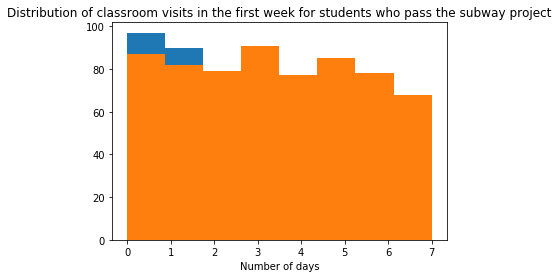

In [143]:
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

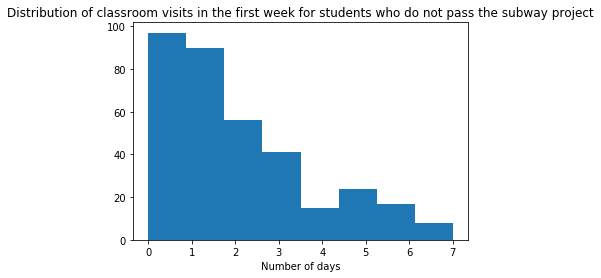

In [144]:
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

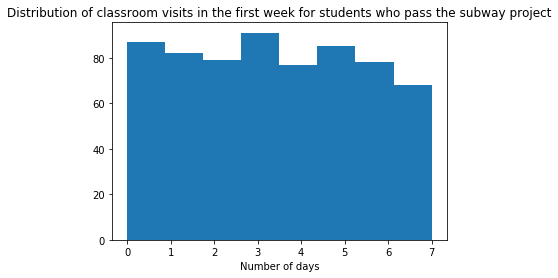

In [145]:

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')